# Simple MNIST NN from scratch

In this notebook, I implemented a simple two-layer neural network and trained it on the MNIST digit recognizer dataset. It's meant to be an instructional example, through which you can understand the underlying math of neural networks better.

Here's a video I made explaining all the math and showing my progress as I coded the network: https://youtu.be/w8yWXqWQYmU

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('train.csv')

In [2]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T # make sure each column is an data piece
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

m_train

41000

In [3]:
Y_train

array([0, 7, 7, ..., 8, 7, 8])

In [4]:

def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (4, 10) + inhomogeneous part.

In [5]:
class Network:
    def __init__(self, sizes) -> None:
        self.num_layers = len(sizes)
        self.sizes = sizes
        


In [6]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[9 9 9 ... 9 9 9] [0 7 7 ... 8 7 8]
0.14929268292682926
Iteration:  10
[2 8 7 ... 4 7 6] [0 7 7 ... 8 7 8]
0.2687317073170732
Iteration:  20
[2 8 7 ... 4 7 6] [0 7 7 ... 8 7 8]
0.37234146341463414
Iteration:  30
[0 8 7 ... 4 7 6] [0 7 7 ... 8 7 8]
0.4256829268292683
Iteration:  40
[0 9 7 ... 4 7 6] [0 7 7 ... 8 7 8]
0.4774634146341463
Iteration:  50
[0 9 7 ... 4 7 2] [0 7 7 ... 8 7 8]
0.5244390243902439
Iteration:  60
[0 9 7 ... 4 7 2] [0 7 7 ... 8 7 8]
0.5650975609756097
Iteration:  70
[0 9 7 ... 4 7 2] [0 7 7 ... 8 7 8]
0.5995121951219512
Iteration:  80
[0 9 7 ... 4 7 8] [0 7 7 ... 8 7 8]
0.6280731707317073
Iteration:  90
[0 9 7 ... 4 7 8] [0 7 7 ... 8 7 8]
0.6528780487804878
Iteration:  100
[0 9 7 ... 8 7 8] [0 7 7 ... 8 7 8]
0.672829268292683
Iteration:  110
[0 9 7 ... 8 7 8] [0 7 7 ... 8 7 8]
0.6904634146341463
Iteration:  120
[0 9 7 ... 8 7 8] [0 7 7 ... 8 7 8]
0.7060731707317073
Iteration:  130
[0 9 7 ... 8 7 8] [0 7 7 ... 8 7 8]
0.7195853658536585
Iteration:  140


~85% accuracy on training set.

In [7]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Let's look at a couple of examples:

Prediction:  [0]
Label:  0


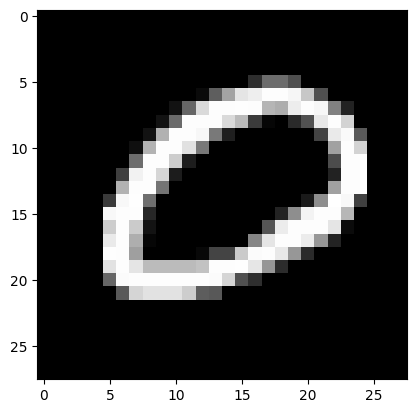

Prediction:  [7]
Label:  7


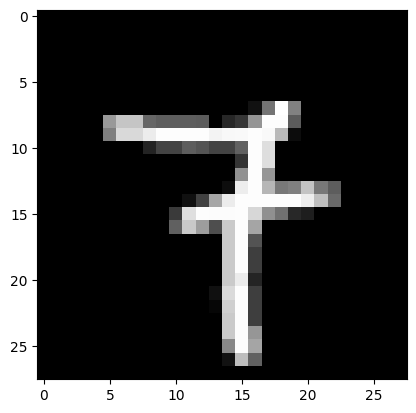

Prediction:  [7]
Label:  7


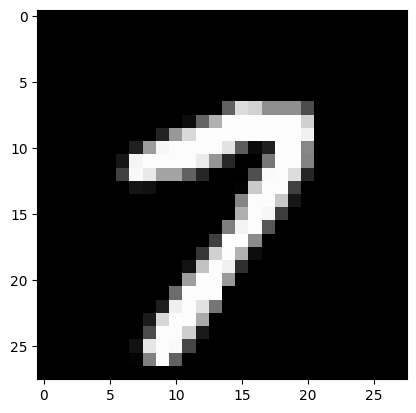

Prediction:  [1]
Label:  1


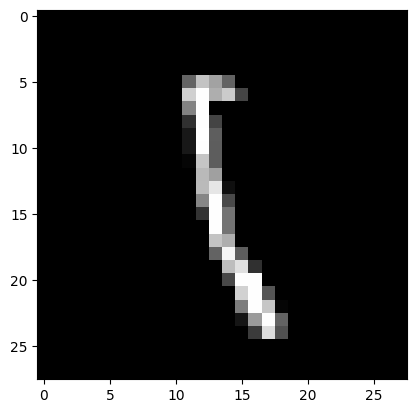

In [8]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

Finally, let's find the accuracy on the dev set:

In [9]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[7 4 1 1 0 1 9 7 1 5 3 5 2 5 0 8 8 2 1 7 9 7 0 9 9 7 9 5 4 9 8 0 8 4 0 3 5
 7 3 2 6 6 7 7 9 8 9 8 2 2 8 7 8 7 2 7 7 3 8 5 2 4 1 5 3 2 7 4 1 4 3 3 6 3
 8 2 8 6 9 1 5 0 1 8 5 2 3 7 4 2 9 7 6 5 9 7 2 2 2 8 2 7 4 1 3 2 2 7 0 3 1
 5 6 6 7 9 7 7 4 7 5 7 7 8 3 1 3 0 5 8 7 9 6 7 0 6 8 7 3 7 1 8 8 4 7 7 8 7
 0 1 1 5 1 4 2 8 6 2 8 3 0 5 1 7 7 0 2 6 3 7 4 4 8 0 6 2 8 3 2 2 6 0 4 5 7
 1 1 9 1 4 1 1 3 4 6 0 6 6 9 4 3 7 8 5 8 0 5 3 8 0 5 8 9 4 2 8 4 7 5 0 0 0
 4 2 9 8 1 1 4 4 9 5 0 2 7 8 3 1 9 2 0 0 1 3 5 0 7 6 3 4 0 8 8 3 8 5 2 9 3
 2 8 9 7 5 8 1 8 9 3 6 9 0 9 5 4 1 6 9 4 2 3 5 7 1 0 7 8 2 6 5 0 0 6 5 1 4
 2 5 0 3 5 7 7 0 3 1 8 7 9 8 6 1 9 0 4 1 8 7 7 7 9 0 0 4 6 3 9 6 7 3 8 6 5
 4 1 5 3 3 5 7 9 1 0 1 6 0 0 7 9 0 3 8 8 9 9 1 4 7 5 2 9 7 7 9 8 9 7 2 6 5
 2 7 0 8 1 6 6 5 2 4 4 7 2 5 1 2 4 6 8 8 8 8 7 3 7 3 9 5 5 2 6 4 7 4 4 8 7
 9 9 5 0 2 7 7 0 9 3 9 7 1 8 9 7 3 0 2 8 1 4 4 4 1 3 6 5 4 7 5 4 9 5 6 9 1
 5 6 2 9 3 0 5 3 8 4 8 9 7 3 9 1 2 7 3 7 3 6 0 7 2 2 5 7 6 9 7 8 1 5 9 8 1
 4 0 2 1 0 0 5 9 0 3 5 4 

np.float64(0.858)

Still 84% accuracy, so our model generalized from the training data pretty well.